In [25]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


See here: https://cms-analysis.docs.cern.ch/guidelines/plotting/colors/ for plot styling suggestions from PubComm

## Import coffea files -- signal and background

In [26]:
prefix = './coffea/skimmed/'
suffix = 'VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95'

In [27]:
# Signal
#sig_histo = util.load(f'{prefix}/signal{suffix}.coffea')[0]

In [28]:
# Background
bkg_histo = util.load(f'{prefix}/bkg_{suffix}.coffea')[0]

In [29]:
# Data
data_histo = util.load(f'{prefix}/data_{suffix}.coffea')[0]

In [30]:
data_histo.keys()

dict_keys(['sel_vtx_mindxy', 'sel_vtx_vxy1', 'sel_vtx_vxy10', 'sel_vtx_vxy100', 'sel_vtx_vxy_fromPV1', 'sel_vtx_vxy_fromPV10', 'sel_vtx_vxy_fromPV100', 'sel_vtx_vx1', 'sel_vtx_vx10', 'sel_vtx_vx100', 'sel_vtx_vy1', 'sel_vtx_vy10', 'sel_vtx_vy100', 'sel_vtx_vx_fromPV1', 'sel_vtx_vx_fromPV10', 'sel_vtx_vx_fromPV100', 'sel_vtx_vy_fromPV1', 'sel_vtx_vy_fromPV10', 'sel_vtx_vy_fromPV100', 'sel_vtx_CosThetaColl', 'sel_vtx_CosThetaColl_fromPV', 'sel_vtx_CosThetaColl_fromPV_refit', 'sel_vtx_vxy1_vs_CosThetaColl', 'sel_vtx_vxy10_vs_CosThetaColl', 'sel_vtx_vxy1_fromPV_vs_CosThetaColl_fromPV', 'sel_vtx_vxy10_fromPV_vs_CosThetaColl_fromPV', 'sel_vtx_vxy1_fromPV_vs_CosThetaColl_fromPV_refit', 'sel_vtx_vxy10_fromPV_vs_CosThetaColl_fromPV_refit', 'CosThetaColl_vs_CosThetaColl_fromPV', 'CosThetaColl_fromPV_vs_CosThetaColl_fromPV_refit', 'PVx', 'PVy', 'sel_vtx_sign', 'sel_vtx_sign_vs_sel_vtx_pt_ratio', 'sel_vtx_sign_vs_CosThetaColl_fromPV_refit', 'sel_vtx_pt_ratio', 'sel_vtx_pt_ratio_vs_CosThetaColl_fro

## Data and Background

Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_dEta_cut9.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_dEta_cut9.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_dEta_cut10.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_dEta_cut10.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_dEta_cut11.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_dEta_cut11.png


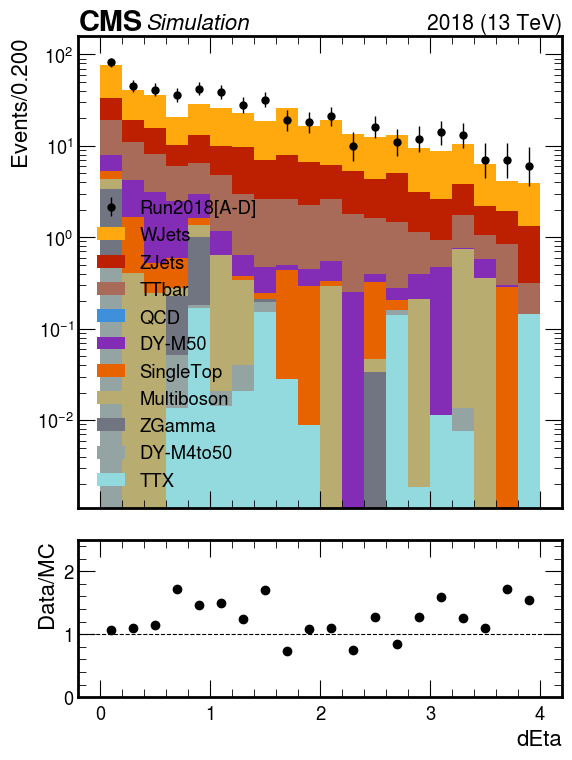

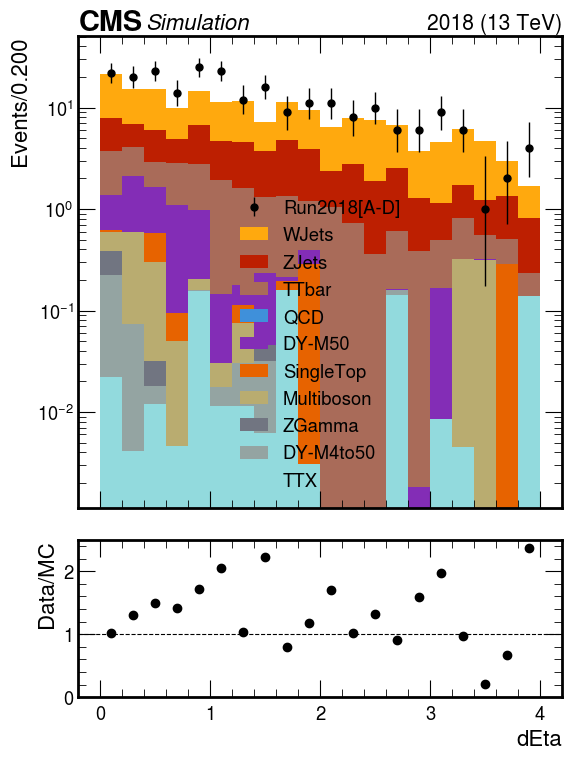

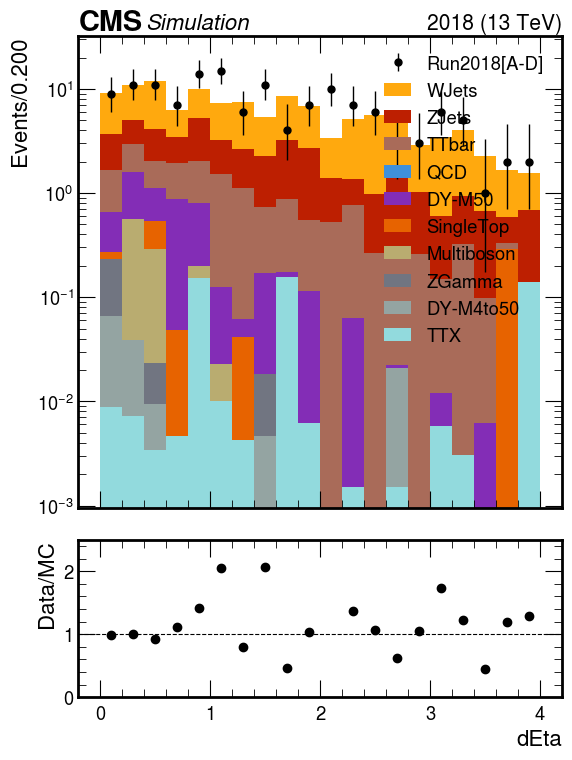

In [31]:
variable = 'sel_vtx_dEta'
cut = 'cut9'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 10j,
    'xlim': [0,4],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots/{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

# ISR cut
cut = 'cut9'
#style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

# VR cut
cut = 'cut10'
style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

# VR cut
cut = 'cut11'
style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_dPhi_cut9.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_dPhi_cut9.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_dPhi_cut10.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_dPhi_cut10.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_dPhi_cut11.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_dPhi_cut11.png


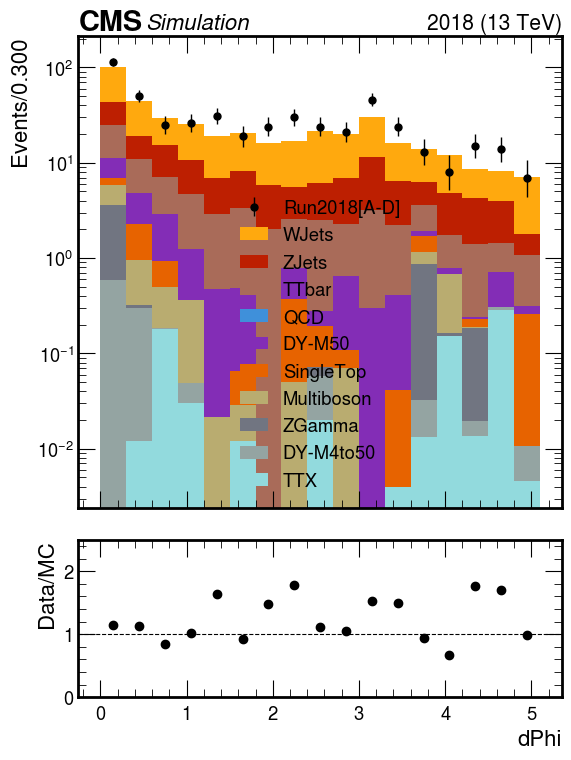

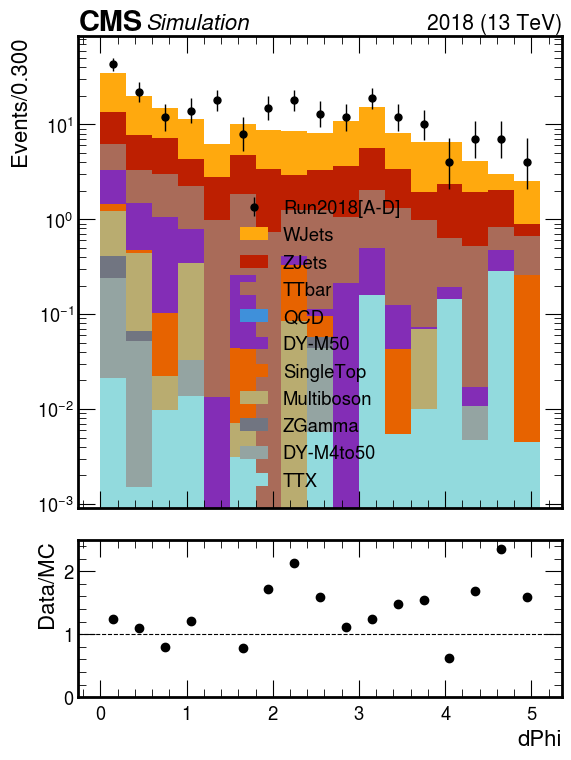

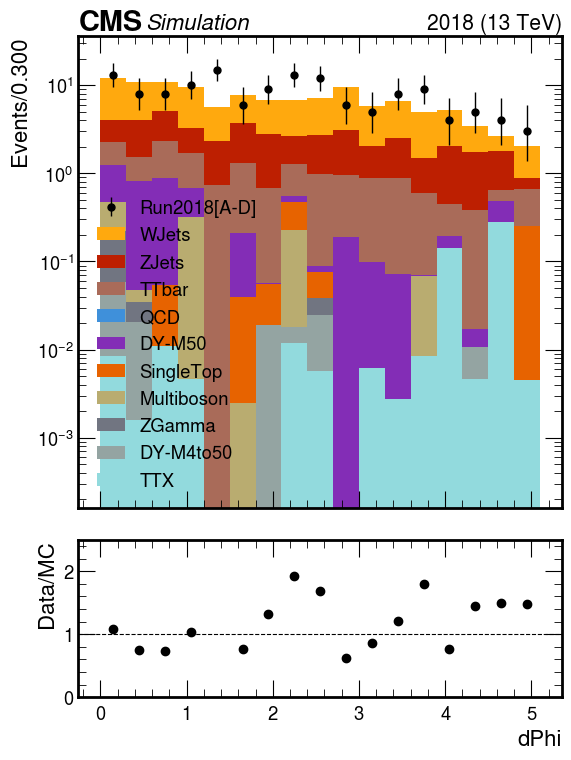

In [32]:
variable = 'sel_vtx_dPhi'
cut = 'cut9'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 15j,
    'xlim': [0,5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots/{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

# ISR cut
cut = 'cut9'
#style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

# VR cut
cut = 'cut10'
style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

# VR cut
cut = 'cut11'
style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_log10dEtadPhi_cut9.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/Beamspot/../../analysisTools/plotTools.py:1420: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_log10dEtadPhi_cut9.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_log10dEtadPhi_cut10.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/Beamspot/../../analysisTools/plotTools.py:1420: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_log10dEtadPhi_cut10.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_log10dEtadPhi_cut11.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/Beamspot/../../analysisTools/plotTools.py:1420: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_log10dEtadPhi_cut11.png


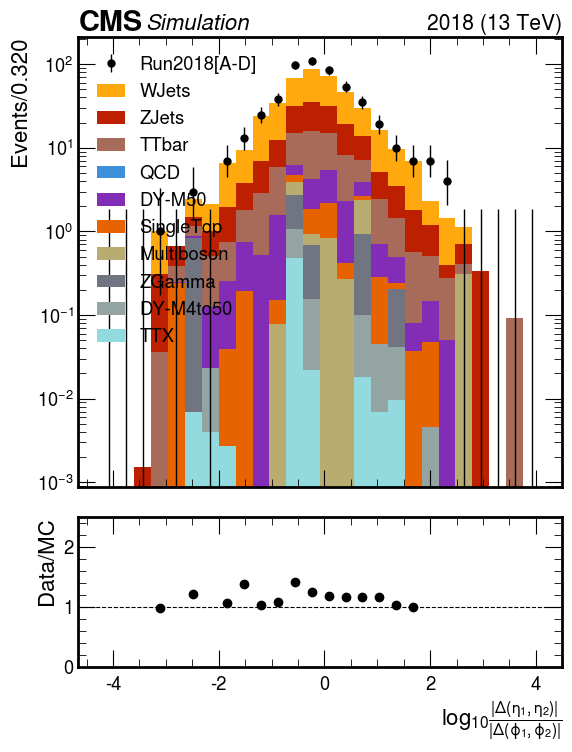

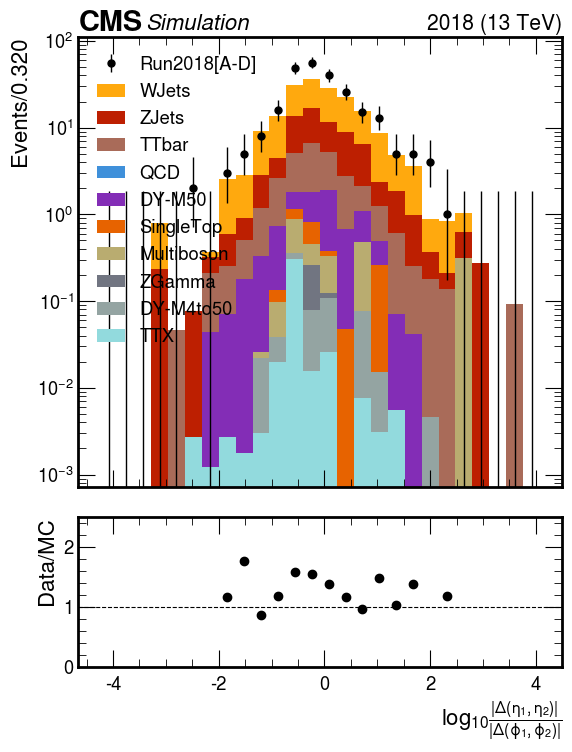

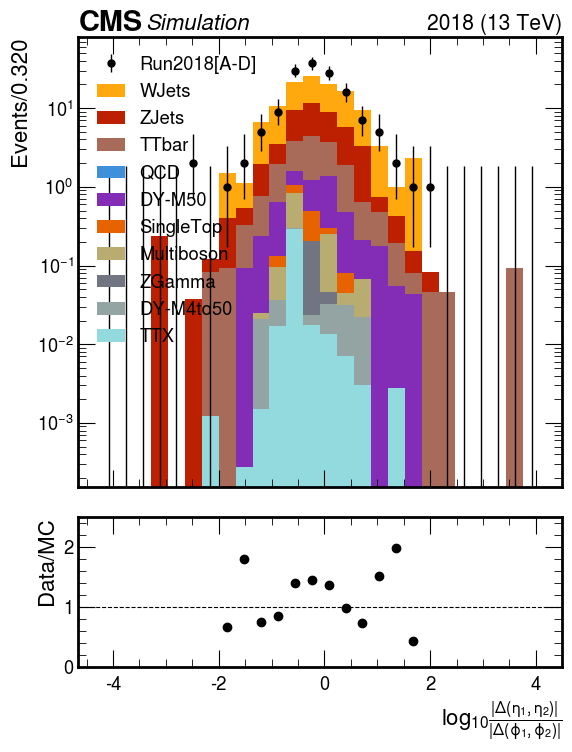

In [46]:
variable = 'sel_vtx_log10dEtadPhi'
cut = 'cut9'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 8j,
    'xlim': [-4,4],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$log_{10}\frac{|\Delta(\eta_{1},\eta_{2})|}{|\Delta(\phi_{1},\phi_{2})|}$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots/{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

# ISR cut
cut = 'cut9'
#style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

# VR cut
cut = 'cut10'
style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

# VR cut
cut = 'cut11'
style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data/sel_vtx//data_VR_sel_vtx_log10dEtadPhi_vs_CosThetaColl_fromPV_refit_cut10.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data/sel_vtx//data_VR_sel_vtx_log10dEtadPhi_vs_CosThetaColl_fromPV_refit_cut10.png


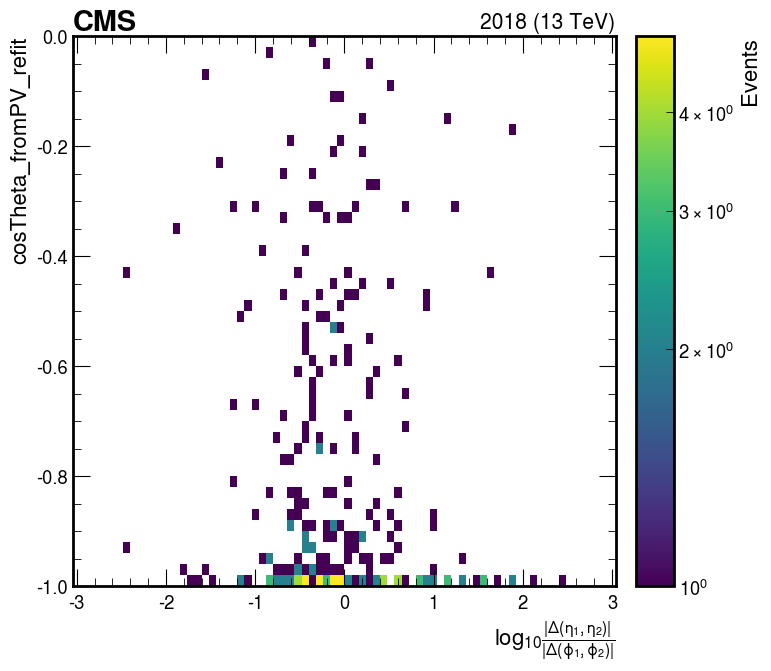

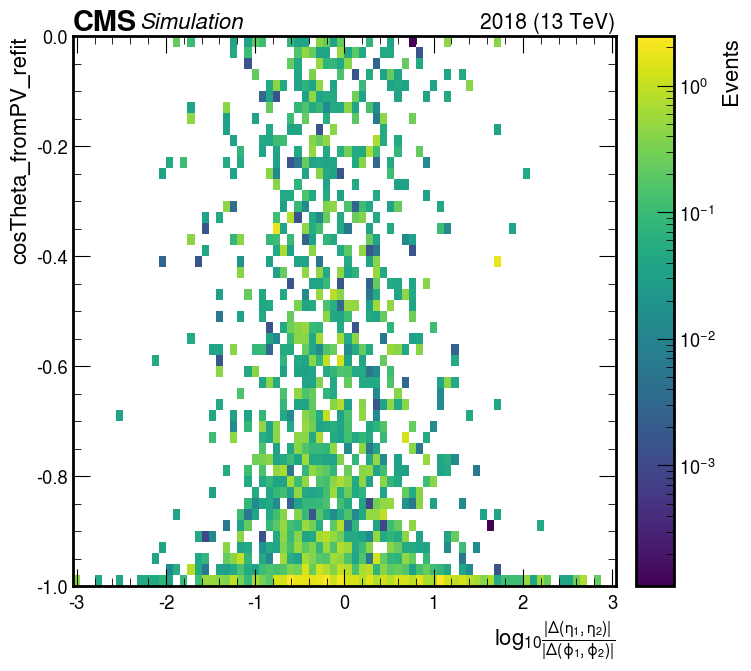

In [52]:
# Plot settings
fig, ax = plt.subplots(figsize=(7,7))

cut = 'cut10'
variable = 'sel_vtx_log10dEtadPhi_vs_CosThetaColl_fromPV_refit'

plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_2d_dict = {
    'fig': fig,
    'ax': ax,
    'xrebin': 2j,
    'yrebin': 1j,
    'xlim': [-4,4],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [-1.1,0],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': r"$log_{10}\frac{|\Delta(\eta_{1},\eta_{2})|}{|\Delta(\phi_{1},\phi_{2})|}$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'zlabel': 'Events',   
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots/{suffix}/data/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

# Data
ptools.plot_data_2D(data_histo, plot_dict, style_2d_dict)


# Bkg

style_2d_dict['fig'], style_2d_dict['ax'] = plt.subplots(figsize=(7,7))
ptools.plot_bkg_2D(bkg_histo, plot_dict, style_2d_dict, processes = 'all')

/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_mindxy_cut9.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/Beamspot/../../analysisTools/plotTools.py:1420: RuntimeWarning: divide by zero encountered in divide
  ratio = hist_data.values()/hist_bkg.values()
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/Beamspot/../../analysisTools/plotTools.py:1420: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_mindxy_cut9.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_mindxy_cut10.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/Beamspot/../../analysisTools/plotTools.py:1420: RuntimeWarning: divide by zero encountered in divide
  ratio = hist_data.values()/hist_bkg.values()
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/Beamspot/../../analysisTools/plotTools.py:1420: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_mindxy_cut10.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_mindxy_cut11.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/Beamspot/../../analysisTools/plotTools.py:1420: RuntimeWarning: divide by zero encountered in divide
  ratio = hist_data.values()/hist_bkg.values()
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/Beamspot/../../analysisTools/plotTools.py:1420: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_mindxy_cut11.png


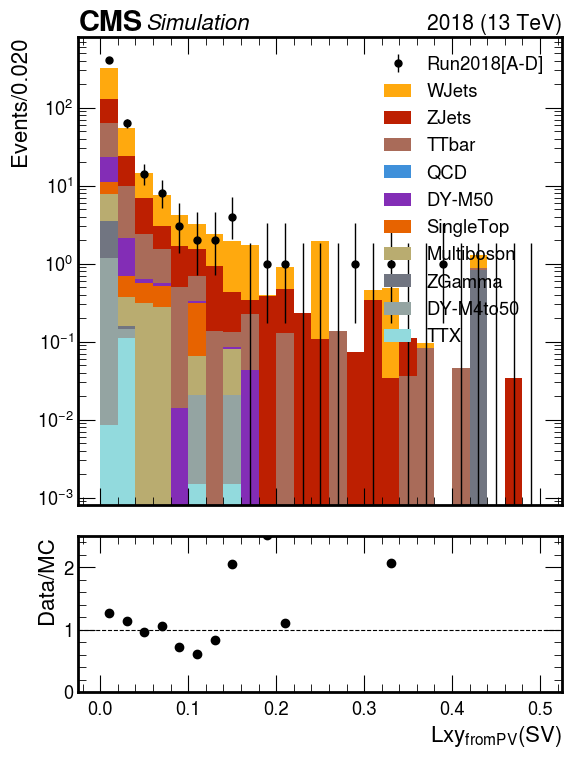

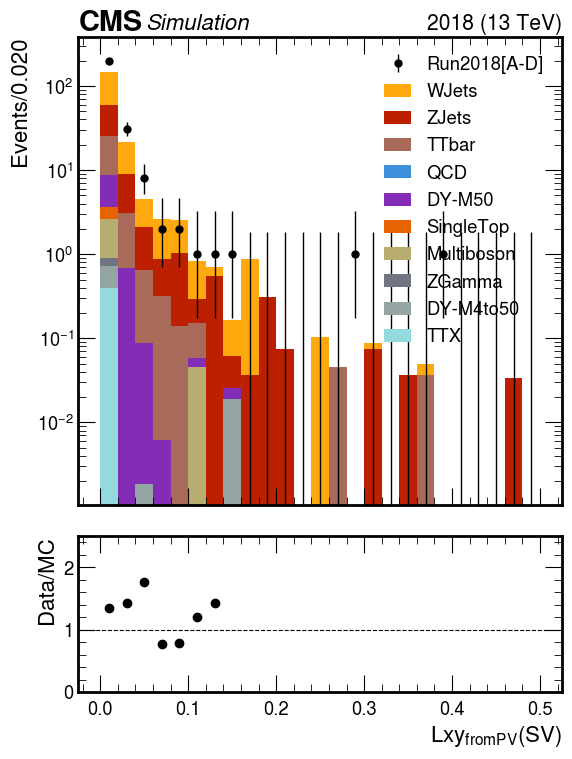

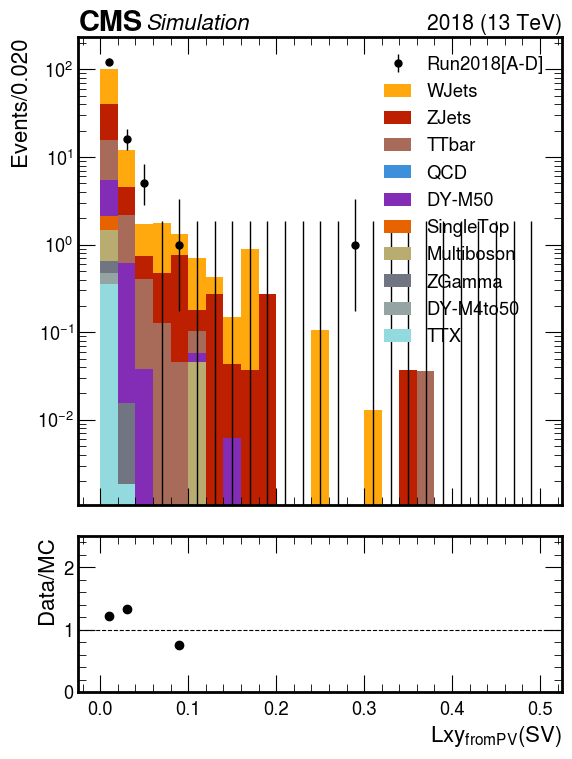

In [7]:
variable = 'sel_vtx_mindxy'
cut = 'cut9'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 2j,
    'xlim': [0,0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$Lxy_{fromPV}(SV)$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots/{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

# ISR cut
cut = 'cut9'
#style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

# VR cut
cut = 'cut10'
style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

# VR cut
cut = 'cut11'
style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_vxy1_cut9.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_vxy1_cut9.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_vxy1_cut10.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_vxy1_cut10.png


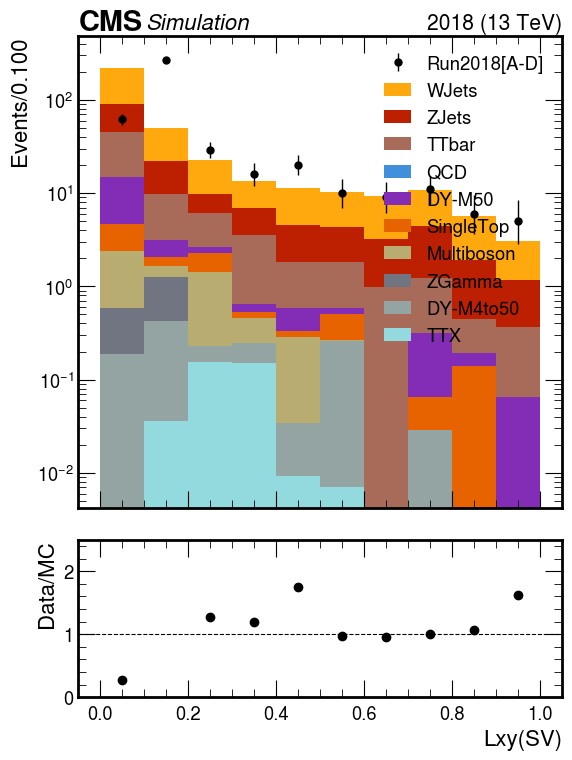

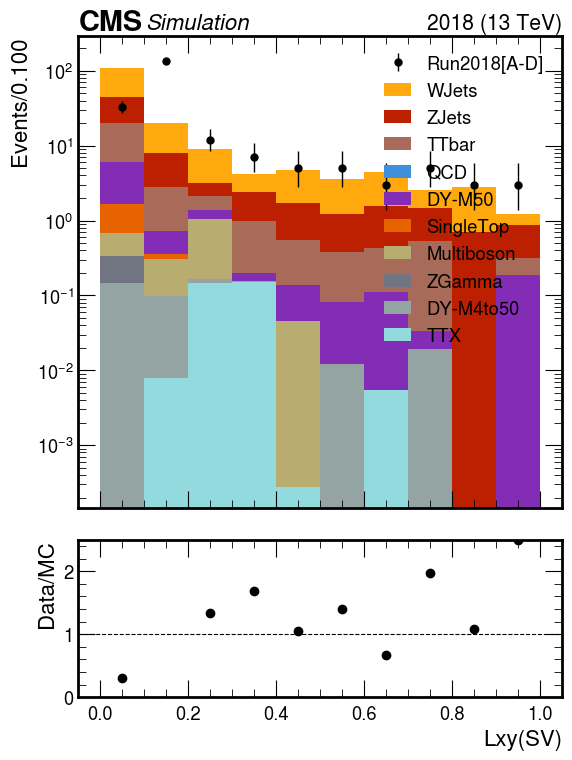

In [8]:
variable = 'sel_vtx_vxy1'
cut = 'cut9'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 10j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': 'Lxy(SV)',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots/{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

# ISR cut
cut = 'cut9'
#style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

# VR cut
cut = 'cut10'
style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_vxy_fromPV1_cut9.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_vxy_fromPV1_cut9.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_vxy_fromPV1_cut10.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_vxy_fromPV1_cut10.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_vxy_fromPV1_cut11.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_vxy_fromPV1_cut11.png


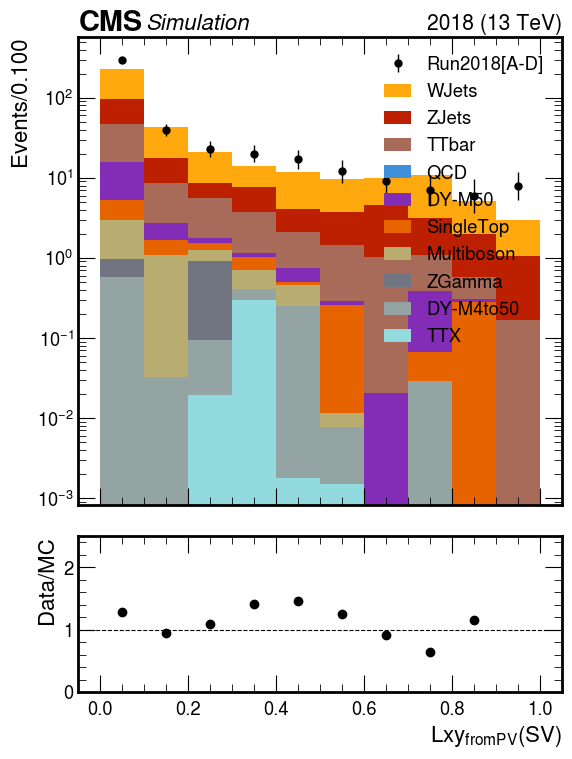

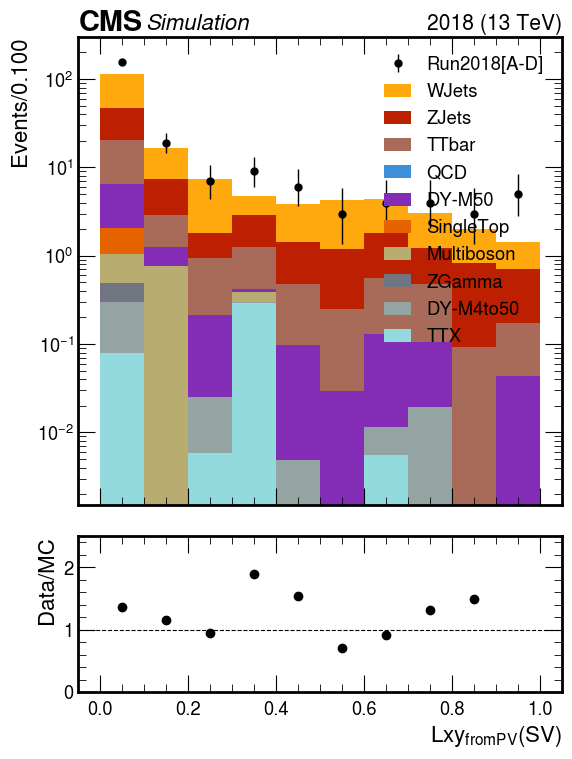

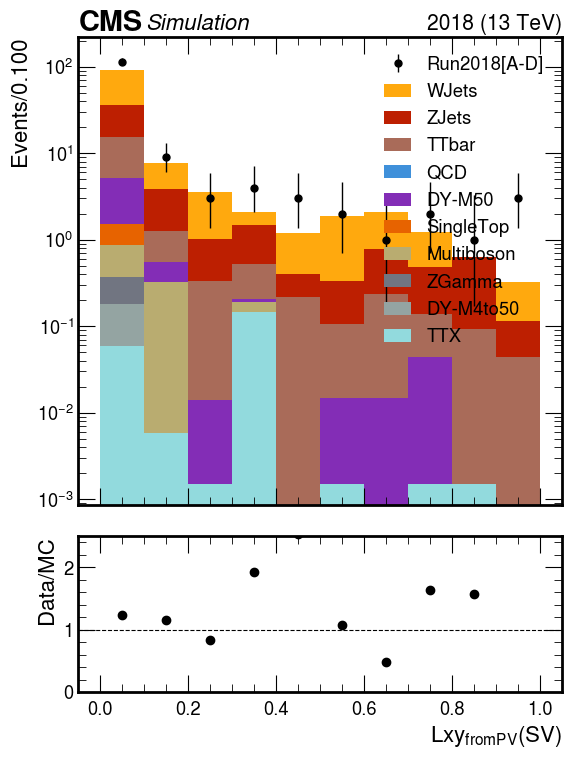

In [9]:
variable = 'sel_vtx_vxy_fromPV1'
cut = 'cut9'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 10j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$Lxy_{fromPV}(SV)$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots/{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

# ISR cut
cut = 'cut9'
#style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

# VR cut
cut = 'cut10'
style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

# VR cut
cut = 'cut11'
style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_vxy_fromPV10_cut9.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_vxy_fromPV10_cut9.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_vxy_fromPV10_cut10.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/Beamspot/../../analysisTools/plotTools.py:1420: RuntimeWarning: divide by zero encountered in divide
  ratio = hist_data.values()/hist_bkg.values()
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/Beamspot/../../analysisTools/plotTools.py:1420: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_vxy_fromPV10_cut10.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_vxy_fromPV10_cut11.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/Beamspot/../../analysisTools/plotTools.py:1420: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_vxy_fromPV10_cut11.png


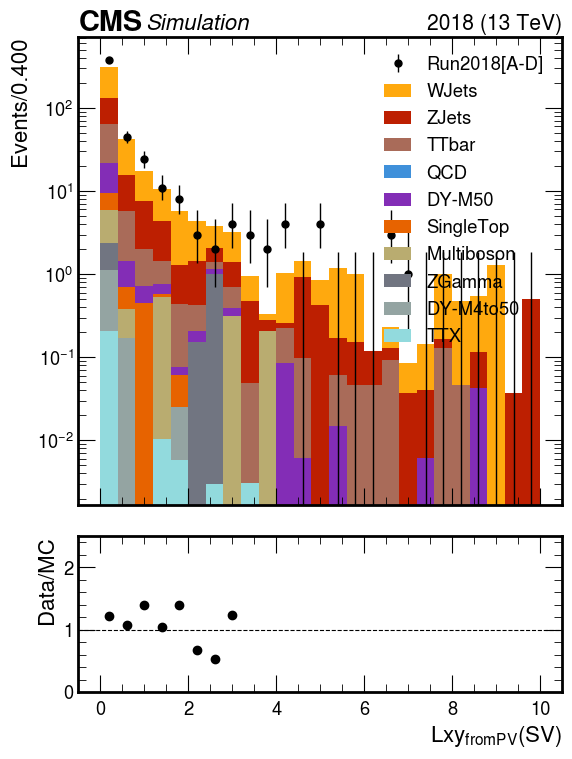

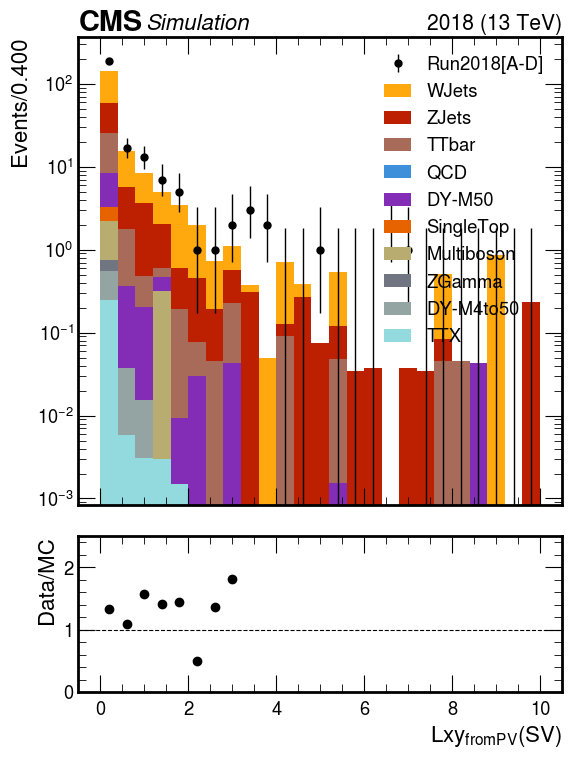

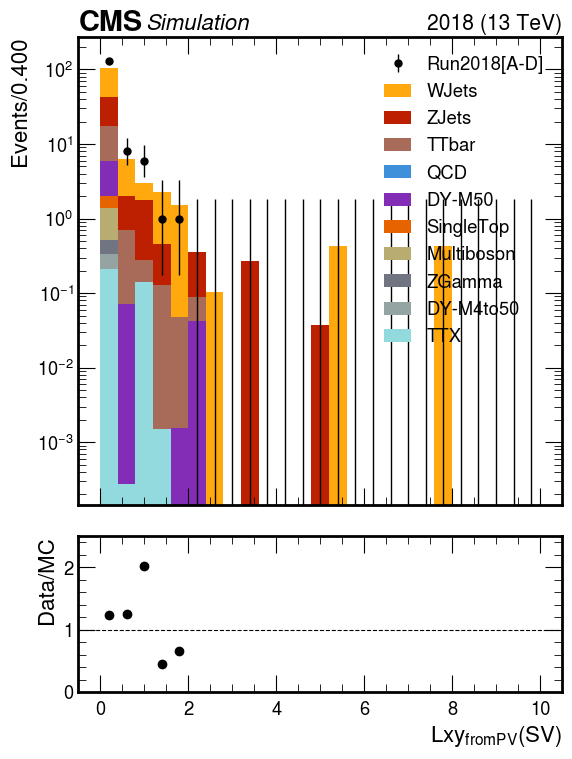

In [10]:
variable = 'sel_vtx_vxy_fromPV10'
cut = 'cut9'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 4j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$Lxy_{fromPV}(SV)$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots/{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

# ISR cut
cut = 'cut9'
#style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

# VR cut
cut = 'cut10'
style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

# VR cut
cut = 'cut11'
style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_vy1_cut9.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_vy1_cut9.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_vy1_cut10.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_vy1_cut10.png


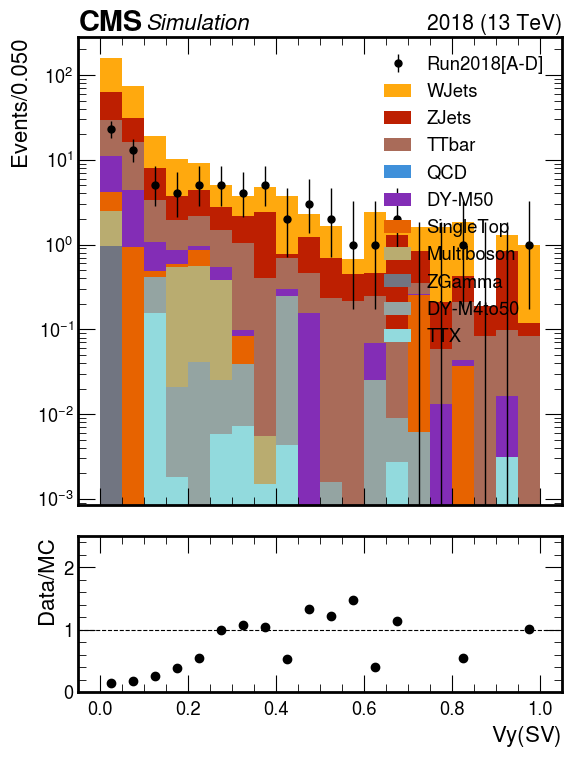

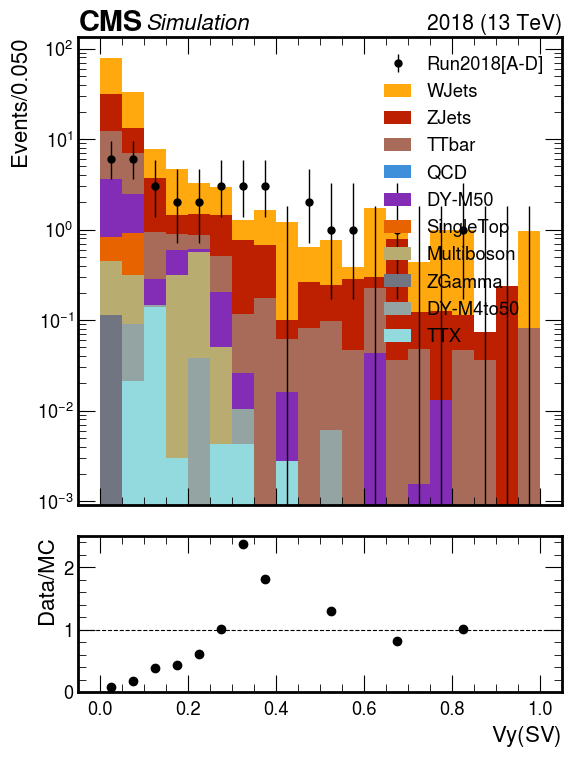

In [11]:
variable = 'sel_vtx_vy1'
cut = 'cut9'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 5j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r'$Vy(SV)$',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots/{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

# ISR cut
cut = 'cut9'
#style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

# VR cut
cut = 'cut10'
style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_vy_fromPV1_cut9.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_vy_fromPV1_cut9.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_vy_fromPV1_cut10.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_vy_fromPV1_cut10.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_vy_fromPV1_cut11.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/Beamspot/../../analysisTools/plotTools.py:1420: RuntimeWarning: divide by zero encountered in divide
  ratio = hist_data.values()/hist_bkg.values()
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/Beamspot/../../analysisTools/plotTools.py:1420: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_vy_fromPV1_cut11.png


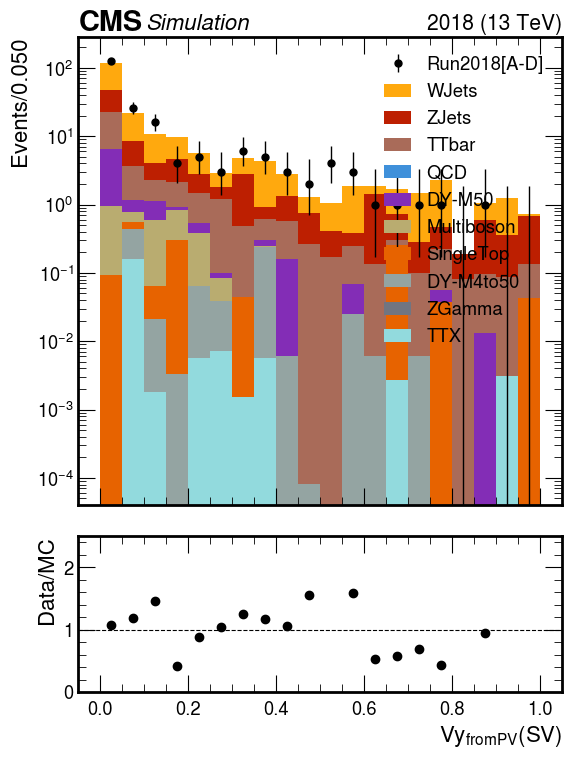

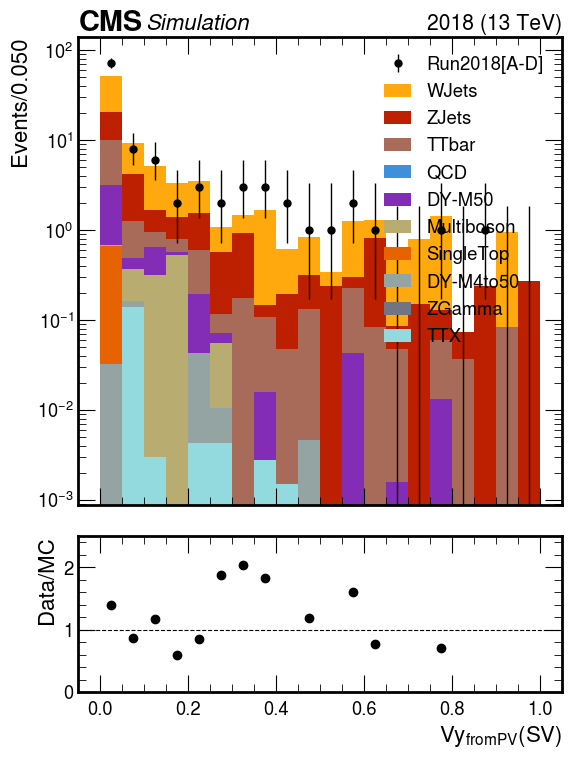

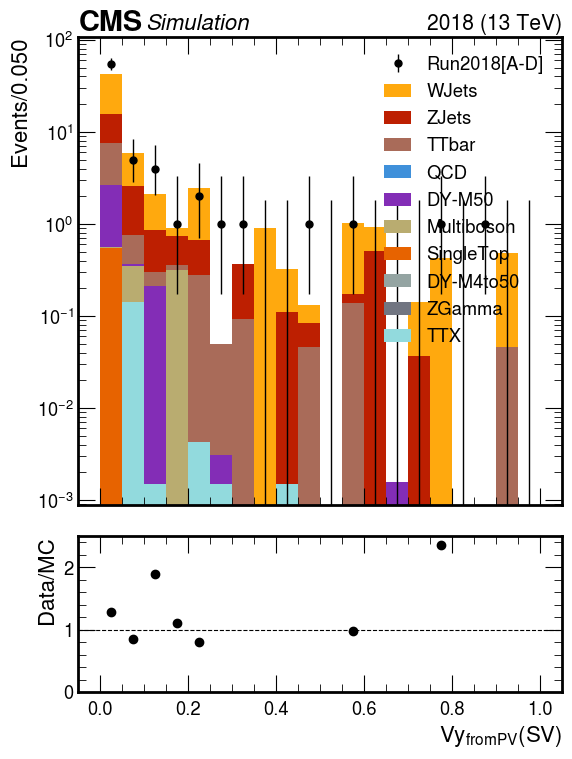

In [12]:
variable = 'sel_vtx_vy_fromPV1'
cut = 'cut9'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 5j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r'$Vy_{fromPV}(SV)$',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots/{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

# ISR cut
cut = 'cut9'
#style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

# VR cut
cut = 'cut10'
style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

# VR cut
cut = 'cut11'
style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_CosThetaColl_cut9.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_CosThetaColl_cut9.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_CosThetaColl_cut10.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_CosThetaColl_cut10.png


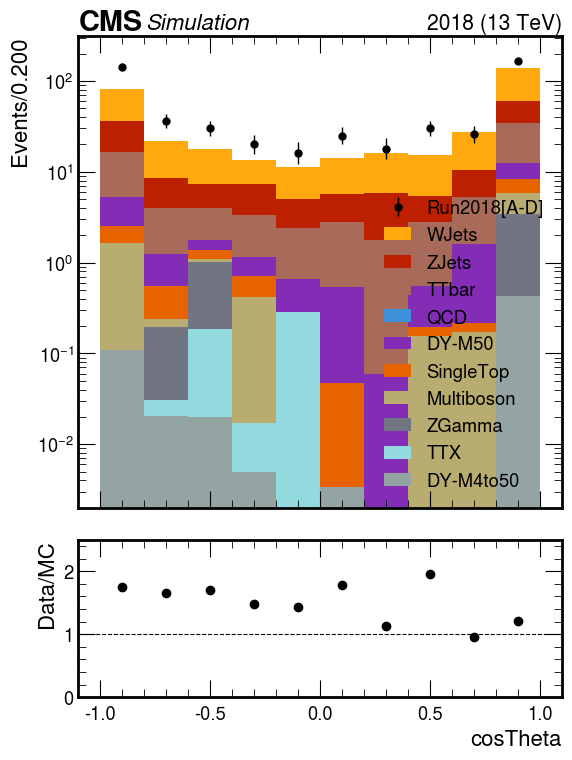

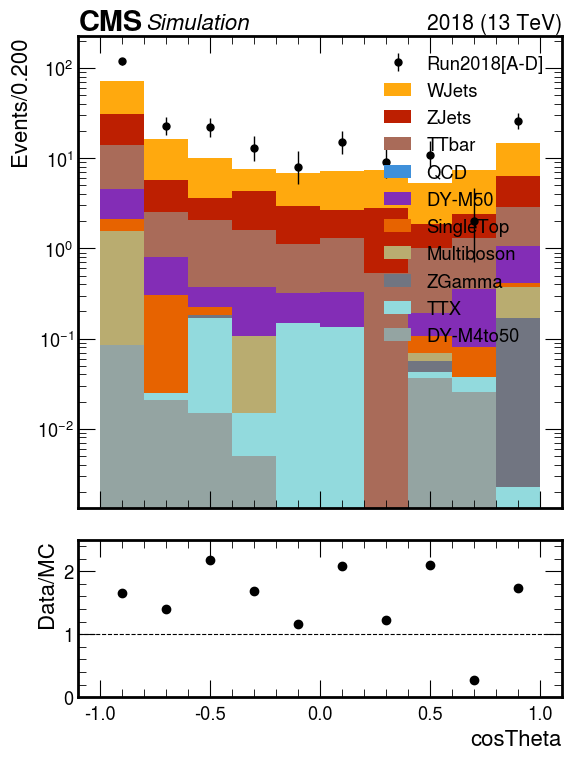

In [12]:
variable = 'sel_vtx_CosThetaColl'
cut = 'cut9'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 10j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots/{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

# ISR cut
cut = 'cut9'
#style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

# VR cut
cut = 'cut10'
style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_CosThetaColl_fromPV_cut9.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_CosThetaColl_fromPV_cut9.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_CosThetaColl_fromPV_cut10.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_CosThetaColl_fromPV_cut10.png


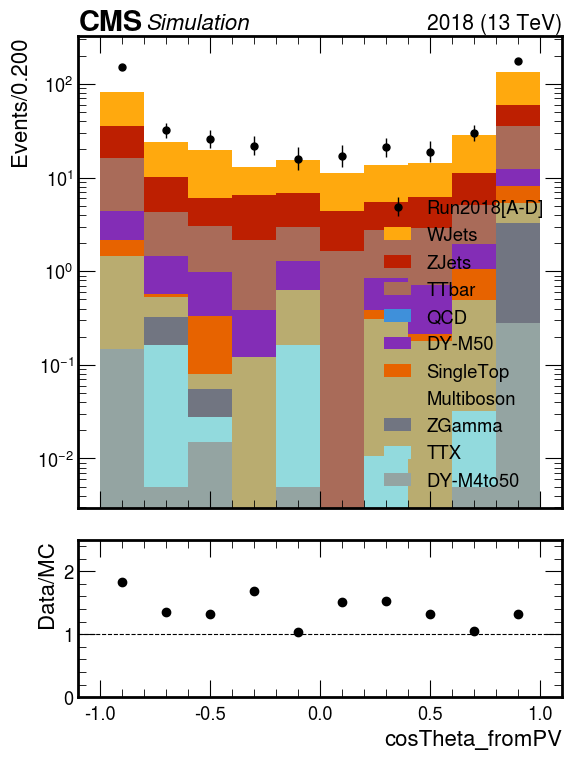

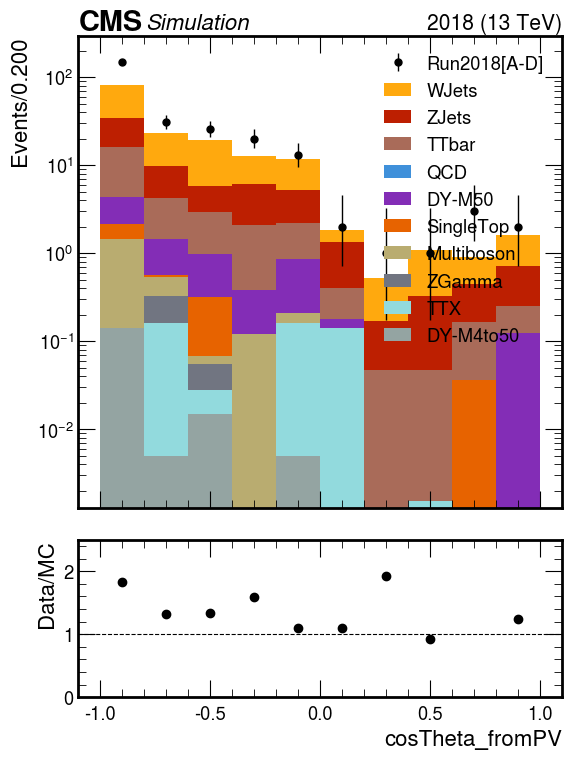

In [13]:
variable = 'sel_vtx_CosThetaColl_fromPV'
cut = 'cut9'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 10j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots/{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

# ISR cut
cut = 'cut9'
#style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

# VR cut
cut = 'cut10'
style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_CosThetaColl_fromPV_refit_cut9.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_CosThetaColl_fromPV_refit_cut9.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_CosThetaColl_fromPV_refit_cut10.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/Beamspot/../../analysisTools/plotTools.py:1420: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_CosThetaColl_fromPV_refit_cut10.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_CosThetaColl_fromPV_refit_cut11.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/Beamspot/../../analysisTools/plotTools.py:1420: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_CosThetaColl_fromPV_refit_cut11.png


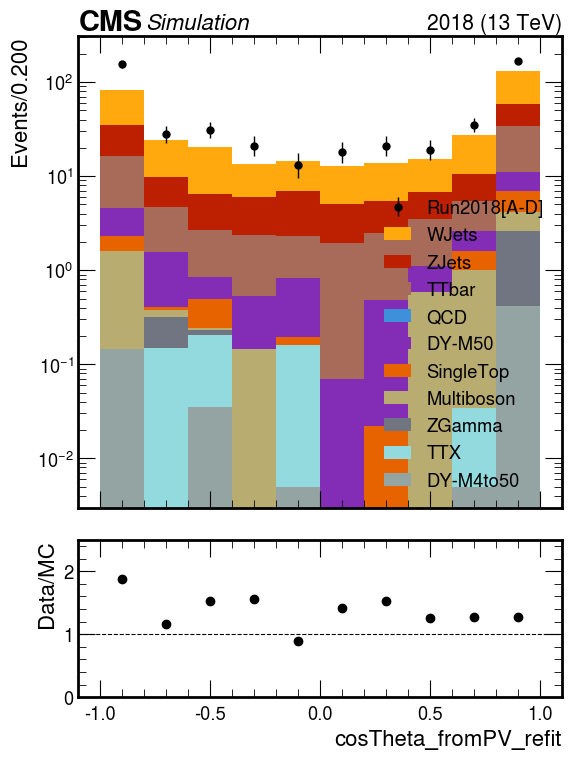

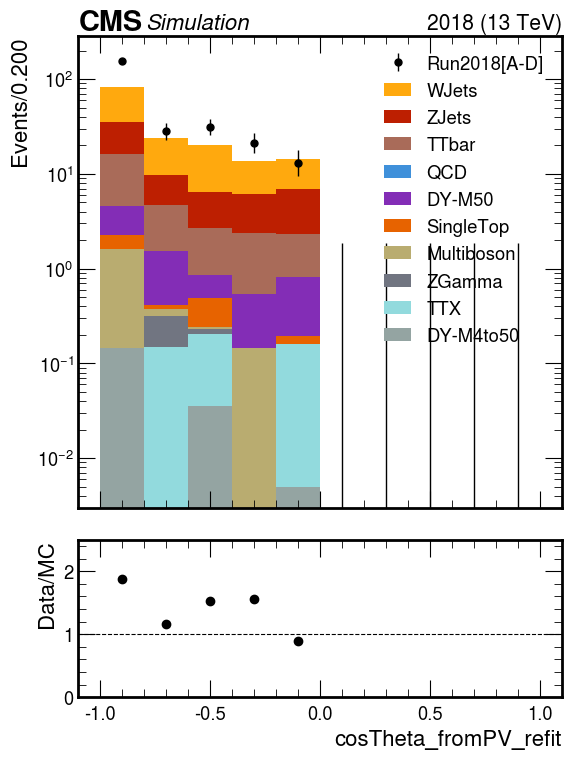

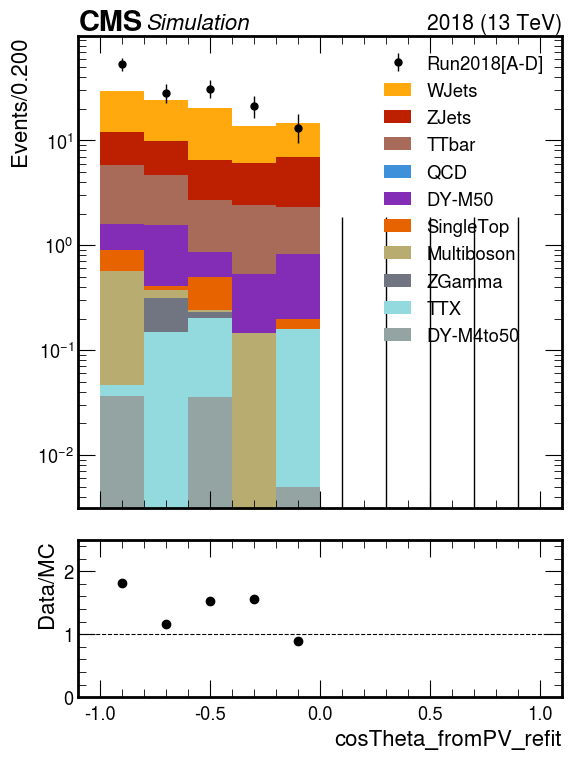

In [14]:
variable = 'sel_vtx_CosThetaColl_fromPV_refit'
cut = 'cut9'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 10j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots/{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

# ISR cut
cut = 'cut9'
#style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

# VR cut
cut = 'cut10'
style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

# VR cut
cut = 'cut11'
style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data/sel_vtx//data_VR_sel_vtx_vxy1_vs_CosThetaColl_cut9.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data/sel_vtx//data_VR_sel_vtx_vxy1_vs_CosThetaColl_cut9.png


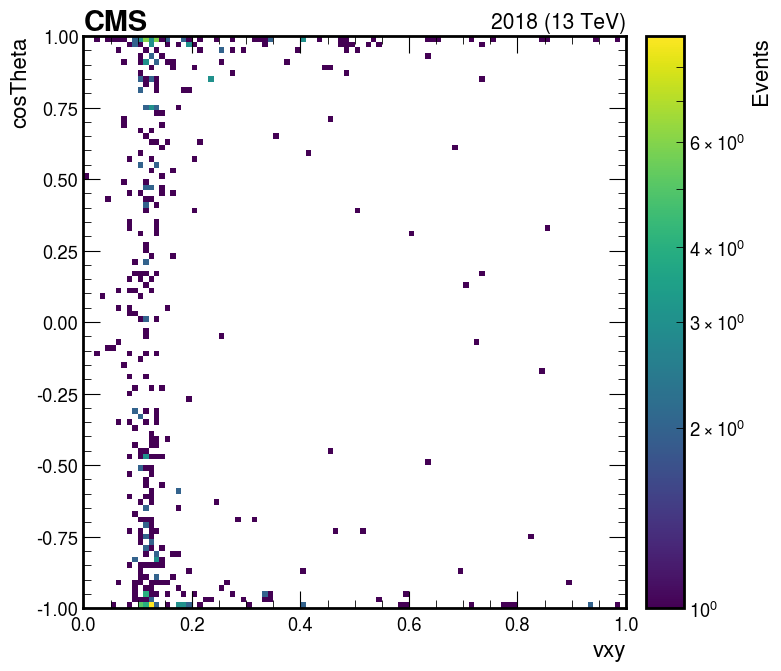

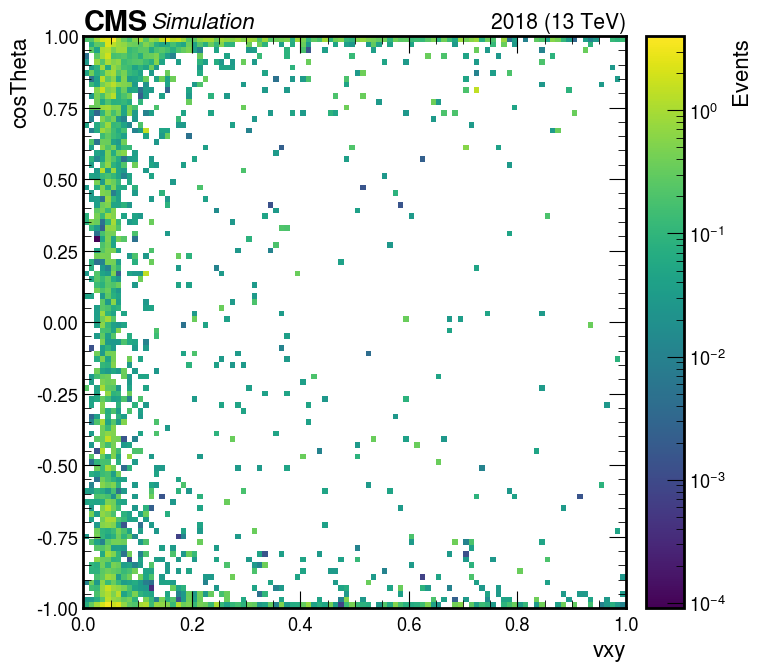

In [15]:
# Plot settings
fig, ax = plt.subplots(figsize=(7,7))

cut = 'cut9'
variable = 'sel_vtx_vxy1_vs_CosThetaColl'

plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_2d_dict = {
    'fig': fig,
    'ax': ax,
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'zlabel': 'Events',   
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots/{suffix}/data/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

# Data
ptools.plot_data_2D(data_histo, plot_dict, style_2d_dict)


# Bkg

style_2d_dict['fig'], style_2d_dict['ax'] = plt.subplots(figsize=(7,7))
ptools.plot_bkg_2D(bkg_histo, plot_dict, style_2d_dict, processes = 'all')

Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data/sel_vtx//data_VR_sel_vtx_vxy10_vs_CosThetaColl_cut9.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data/sel_vtx//data_VR_sel_vtx_vxy10_vs_CosThetaColl_cut9.png


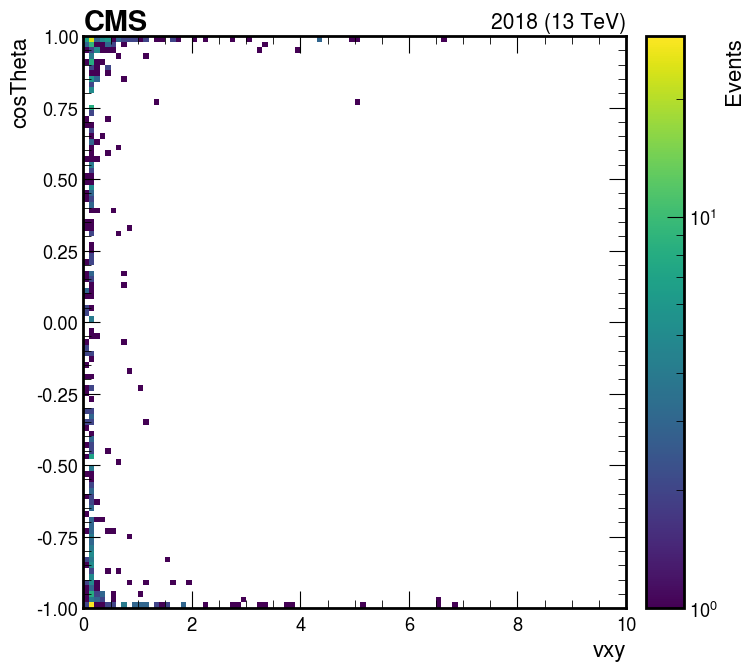

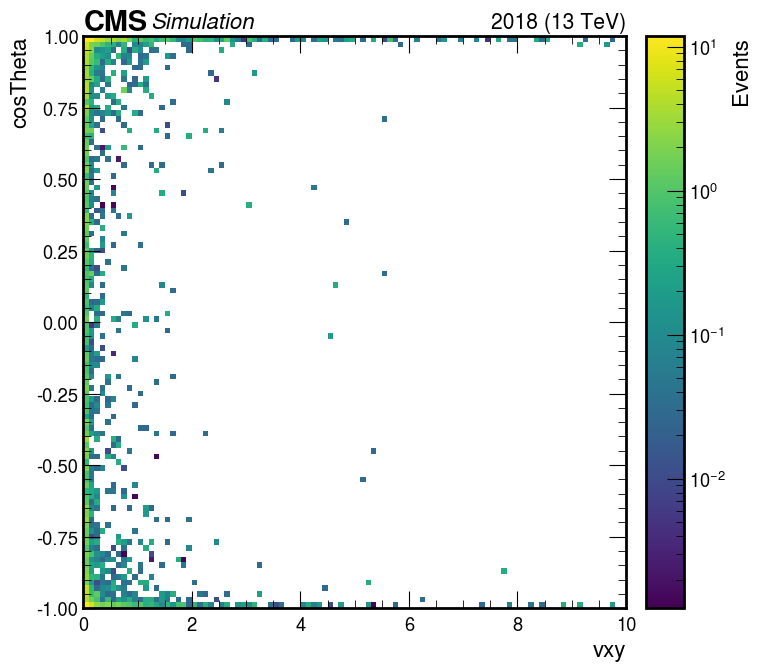

In [16]:
# Plot settings
fig, ax = plt.subplots(figsize=(7,7))

cut = 'cut9'
variable = 'sel_vtx_vxy10_vs_CosThetaColl'

plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_2d_dict = {
    'fig': fig,
    'ax': ax,
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'zlabel': 'Events',   
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots/{suffix}/data/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

# Data
ptools.plot_data_2D(data_histo, plot_dict, style_2d_dict)


# Bkg

style_2d_dict['fig'], style_2d_dict['ax'] = plt.subplots(figsize=(7,7))
ptools.plot_bkg_2D(bkg_histo, plot_dict, style_2d_dict, processes = 'all')

Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data/sel_vtx//data_VR_sel_vtx_vxy1_fromPV_vs_CosThetaColl_fromPV_cut9.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data/sel_vtx//data_VR_sel_vtx_vxy1_fromPV_vs_CosThetaColl_fromPV_cut9.png


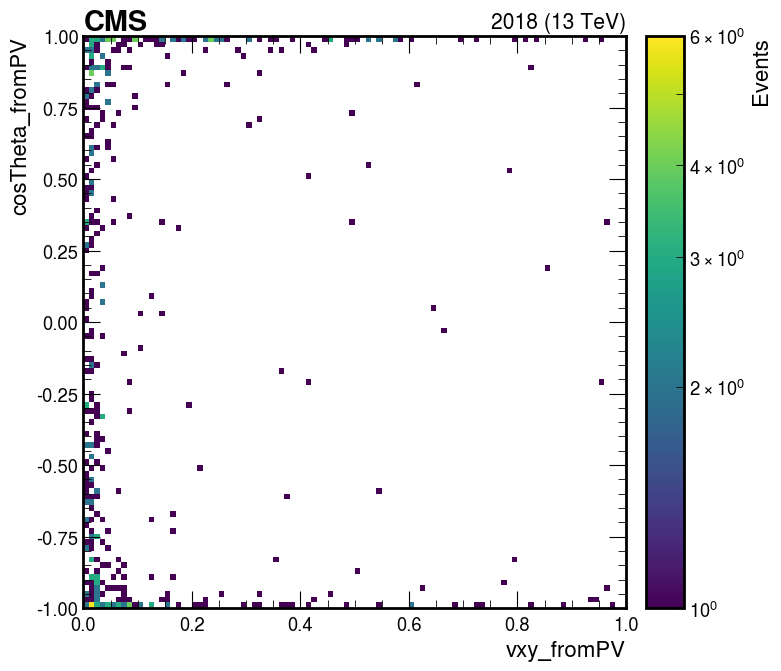

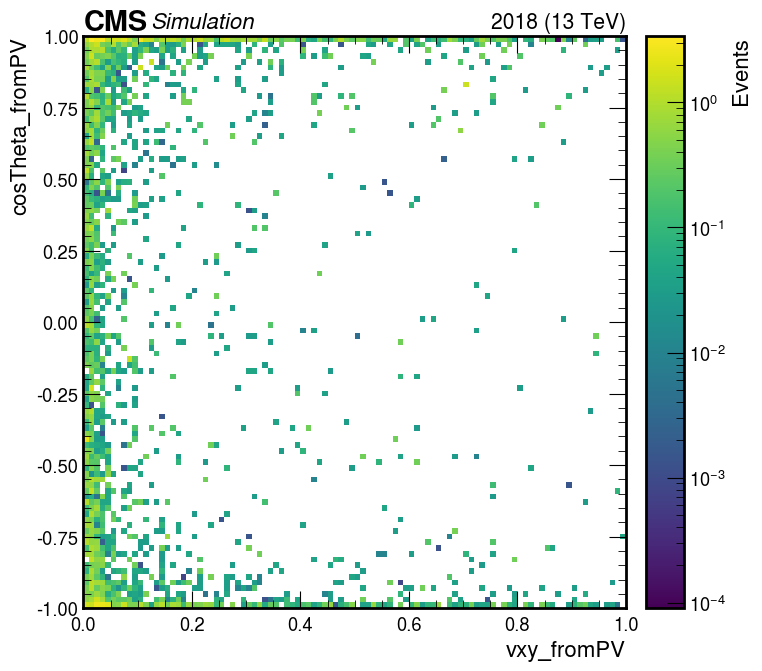

In [17]:
# Plot settings
fig, ax = plt.subplots(figsize=(7,7))

cut = 'cut9'
variable = 'sel_vtx_vxy1_fromPV_vs_CosThetaColl_fromPV'

plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_2d_dict = {
    'fig': fig,
    'ax': ax,
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'zlabel': 'Events',   
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots/{suffix}/data/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

# Data
ptools.plot_data_2D(data_histo, plot_dict, style_2d_dict)


# Bkg

style_2d_dict['fig'], style_2d_dict['ax'] = plt.subplots(figsize=(7,7))
ptools.plot_bkg_2D(bkg_histo, plot_dict, style_2d_dict, processes = 'all')

Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data/sel_vtx//data_VR_sel_vtx_vxy10_fromPV_vs_CosThetaColl_fromPV_cut9.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data/sel_vtx//data_VR_sel_vtx_vxy10_fromPV_vs_CosThetaColl_fromPV_cut9.png


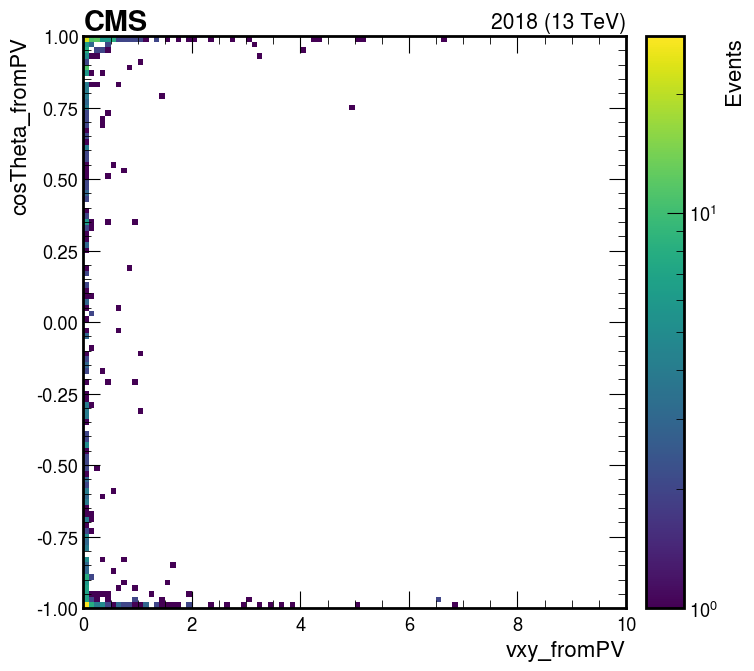

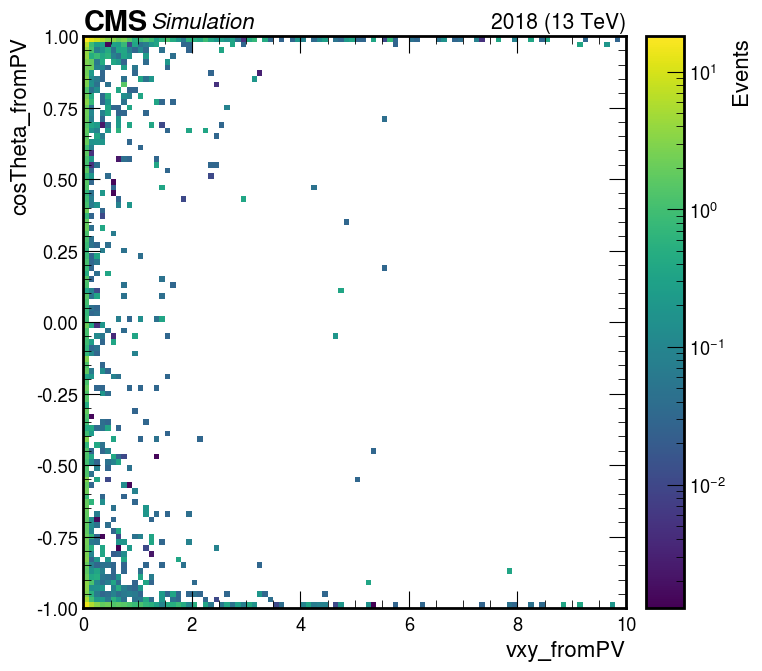

In [18]:
# Plot settings
fig, ax = plt.subplots(figsize=(7,7))

cut = 'cut9'
variable = 'sel_vtx_vxy10_fromPV_vs_CosThetaColl_fromPV'

plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_2d_dict = {
    'fig': fig,
    'ax': ax,
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'zlabel': 'Events',   
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots/{suffix}/data/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

# Data
ptools.plot_data_2D(data_histo, plot_dict, style_2d_dict)


# Bkg

style_2d_dict['fig'], style_2d_dict['ax'] = plt.subplots(figsize=(7,7))
ptools.plot_bkg_2D(bkg_histo, plot_dict, style_2d_dict, processes = 'all')

Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data/sel_vtx//data_VR_sel_vtx_vxy1_fromPV_vs_CosThetaColl_fromPV_refit_cut9.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data/sel_vtx//data_VR_sel_vtx_vxy1_fromPV_vs_CosThetaColl_fromPV_refit_cut9.png


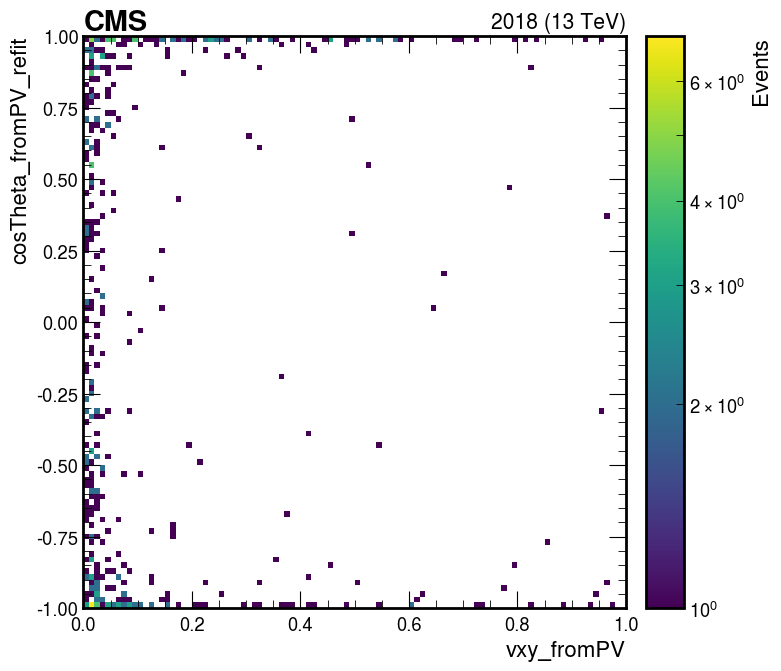

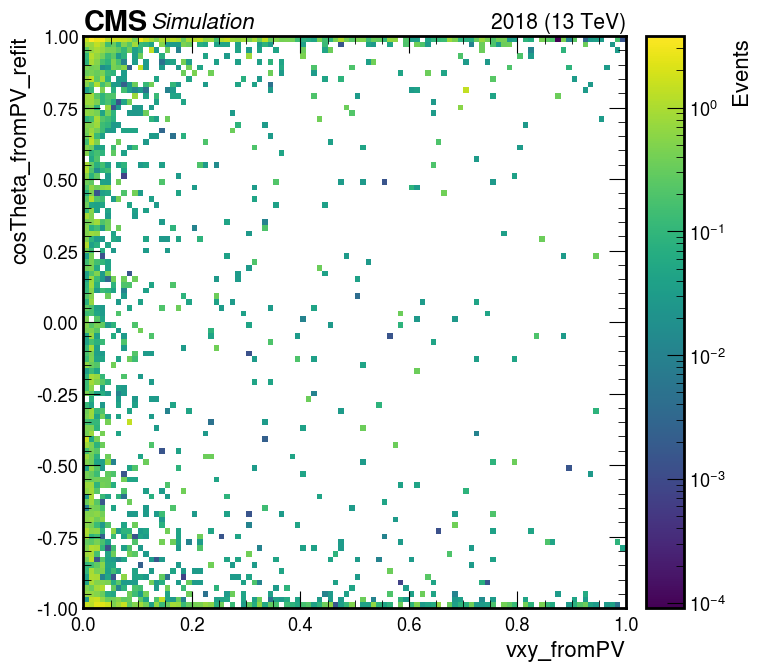

In [19]:
# Plot settings
fig, ax = plt.subplots(figsize=(7,7))

cut = 'cut9'
variable = 'sel_vtx_vxy1_fromPV_vs_CosThetaColl_fromPV_refit'

plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_2d_dict = {
    'fig': fig,
    'ax': ax,
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'zlabel': 'Events',   
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots/{suffix}/data/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

# Data
ptools.plot_data_2D(data_histo, plot_dict, style_2d_dict)


# Bkg

style_2d_dict['fig'], style_2d_dict['ax'] = plt.subplots(figsize=(7,7))
ptools.plot_bkg_2D(bkg_histo, plot_dict, style_2d_dict, processes = 'all')

Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data/sel_vtx//data_VR_sel_vtx_vxy10_fromPV_vs_CosThetaColl_fromPV_refit_cut9.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data/sel_vtx//data_VR_sel_vtx_vxy10_fromPV_vs_CosThetaColl_fromPV_refit_cut9.png


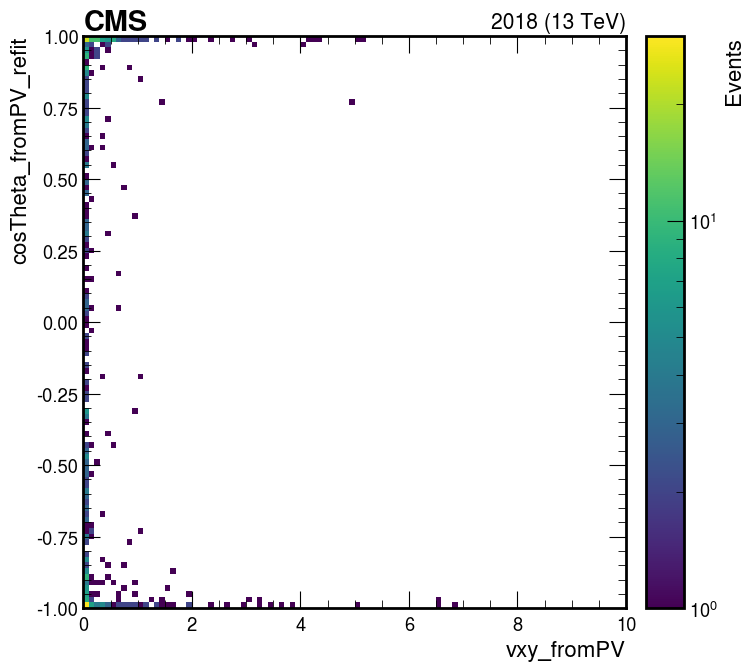

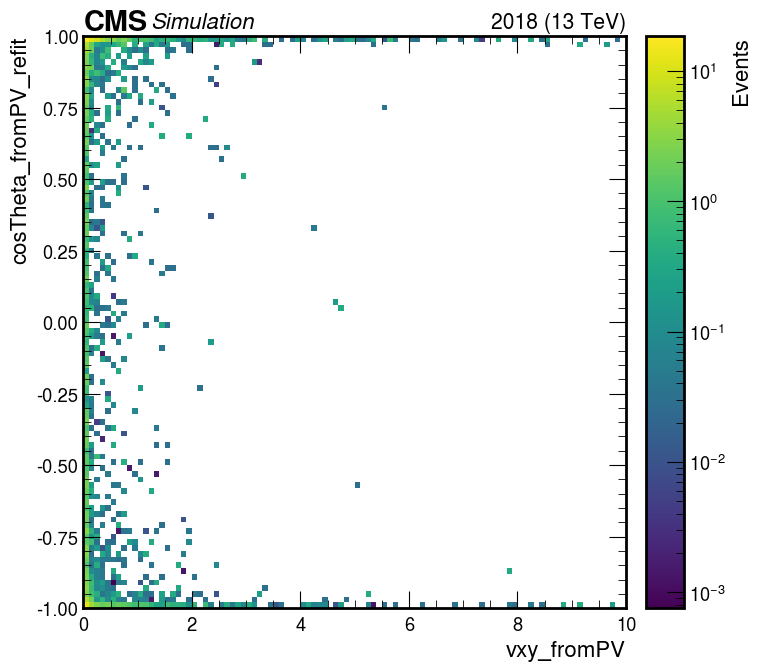

In [20]:
# Plot settings
fig, ax = plt.subplots(figsize=(7,7))

cut = 'cut9'
variable = 'sel_vtx_vxy10_fromPV_vs_CosThetaColl_fromPV_refit'

plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_2d_dict = {
    'fig': fig,
    'ax': ax,
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'zlabel': 'Events',   
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots/{suffix}/data/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

# Data
ptools.plot_data_2D(data_histo, plot_dict, style_2d_dict)


# Bkg

style_2d_dict['fig'], style_2d_dict['ax'] = plt.subplots(figsize=(7,7))
ptools.plot_bkg_2D(bkg_histo, plot_dict, style_2d_dict, processes = 'all')

Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data/sel_vtx//data_VR_CosThetaColl_vs_CosThetaColl_fromPV_cut9.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data/sel_vtx//data_VR_CosThetaColl_vs_CosThetaColl_fromPV_cut9.png


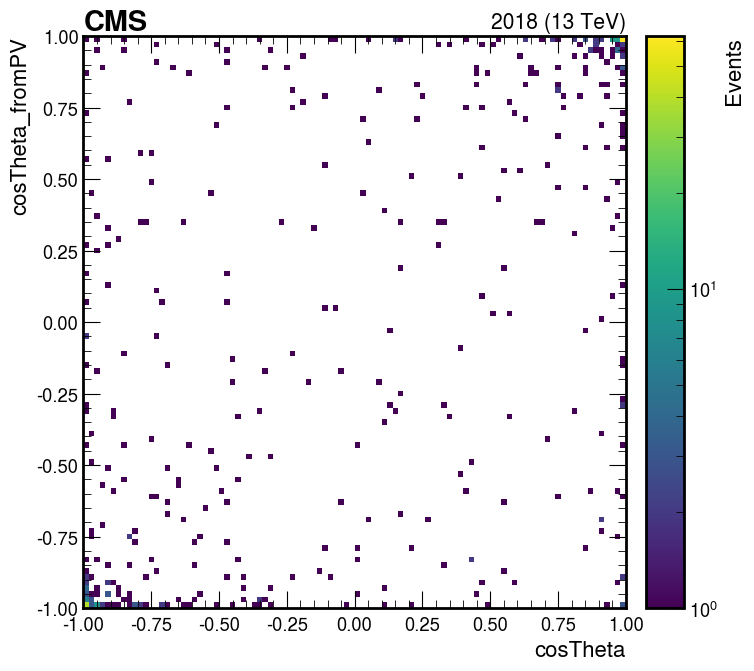

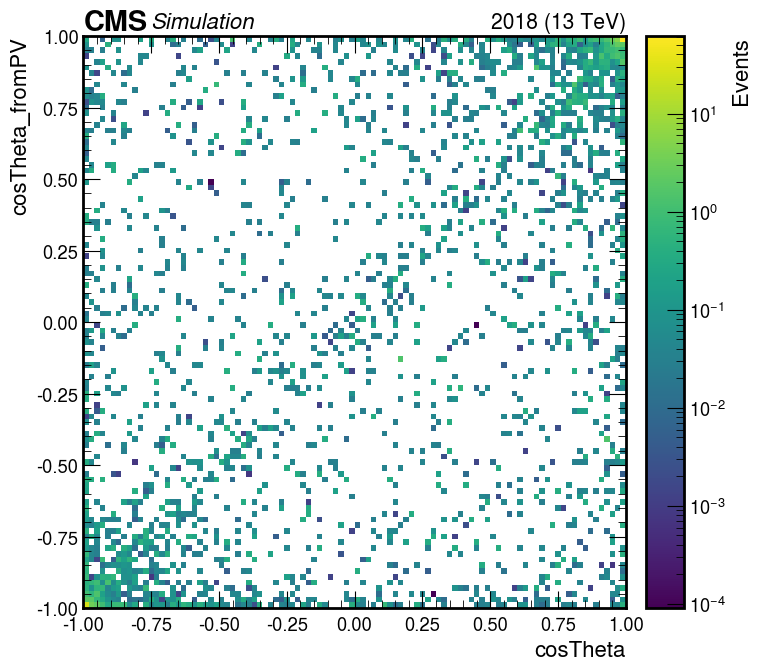

In [21]:
# Plot settings
fig, ax = plt.subplots(figsize=(7,7))

cut = 'cut9'
variable = 'CosThetaColl_vs_CosThetaColl_fromPV'

plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_2d_dict = {
    'fig': fig,
    'ax': ax,
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'zlabel': 'Events',   
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots/{suffix}/data/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

# Data
ptools.plot_data_2D(data_histo, plot_dict, style_2d_dict)


# Bkg

style_2d_dict['fig'], style_2d_dict['ax'] = plt.subplots(figsize=(7,7))
ptools.plot_bkg_2D(bkg_histo, plot_dict, style_2d_dict, processes = 'all')

Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data/sel_vtx//data_VR_CosThetaColl_fromPV_vs_CosThetaColl_fromPV_refit_cut9.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data/sel_vtx//data_VR_CosThetaColl_fromPV_vs_CosThetaColl_fromPV_refit_cut9.png


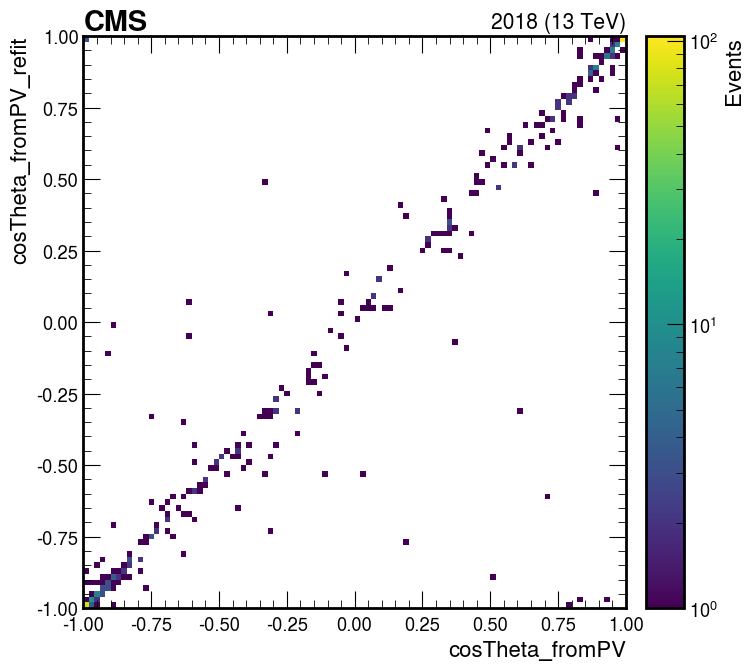

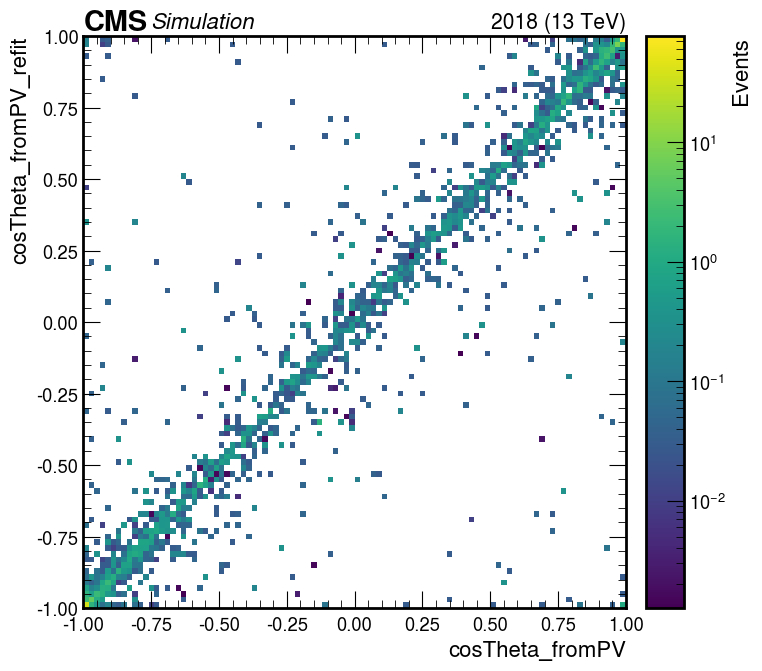

In [22]:
# Plot settings
fig, ax = plt.subplots(figsize=(7,7))

cut = 'cut9'
variable = 'CosThetaColl_fromPV_vs_CosThetaColl_fromPV_refit'

plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_2d_dict = {
    'fig': fig,
    'ax': ax,
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'zlabel': 'Events',   
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots/{suffix}/data/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

# Data
ptools.plot_data_2D(data_histo, plot_dict, style_2d_dict)


# Bkg

style_2d_dict['fig'], style_2d_dict['ax'] = plt.subplots(figsize=(7,7))
ptools.plot_bkg_2D(bkg_histo, plot_dict, style_2d_dict, processes = 'all')

Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_pt_ratio_cut9.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_pt_ratio_cut9.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_pt_ratio_cut10.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data_bkg/sel_vtx//data_VR_sel_vtx_pt_ratio_cut10.png


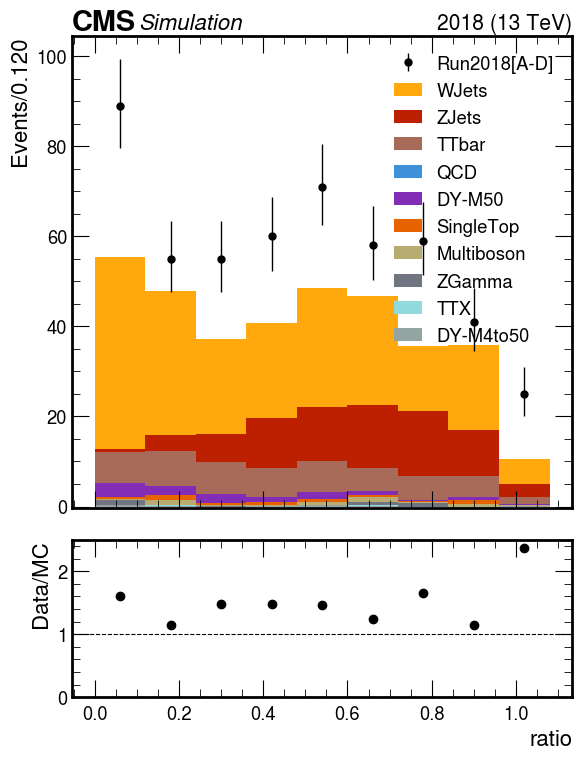

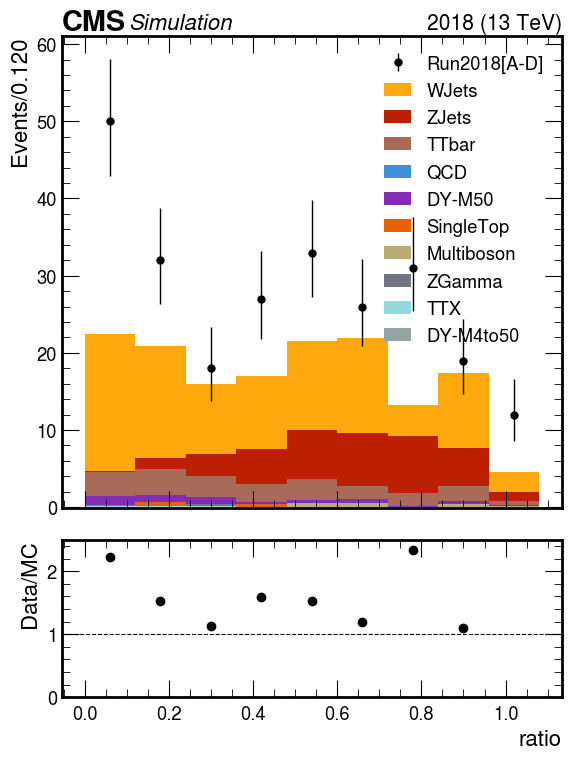

In [23]:
variable = 'sel_vtx_pt_ratio'
cut = 'cut9'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 6j,
    'xlim': [0,1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots/{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

# ISR cut
cut = 'cut9'
#style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

# VR cut
cut = 'cut10'
style_dict['fig'], style_dict['ax'] = plt.subplots(figsize=(6,6))
plot_dict['cut'] = cut
style_dict['outName'] = f'data_VR_{variable}_{cut}.png'
ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data/sel_vtx//data_VR_sel_vtx_pt_ratio_vs_CosThetaColl_fromPV_refit_cut9.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data/sel_vtx//data_VR_sel_vtx_pt_ratio_vs_CosThetaColl_fromPV_refit_cut9.png


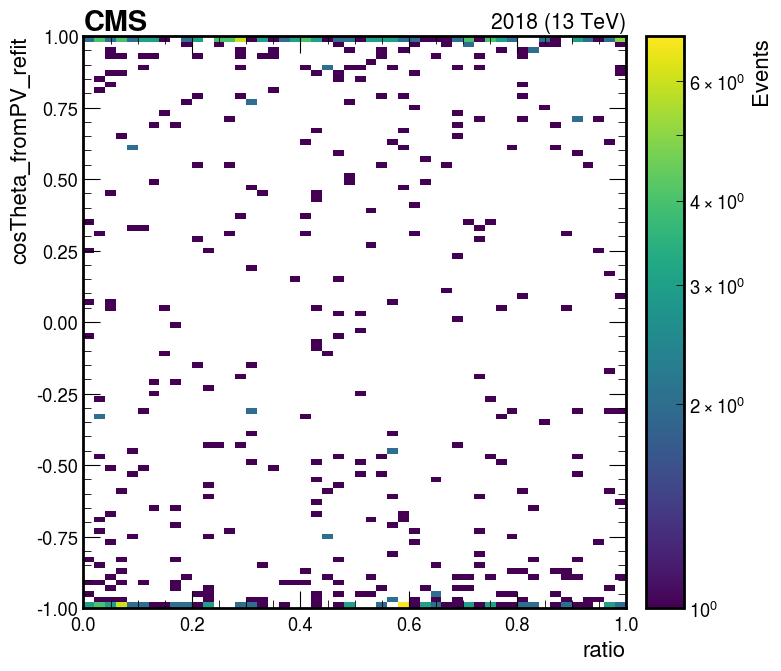

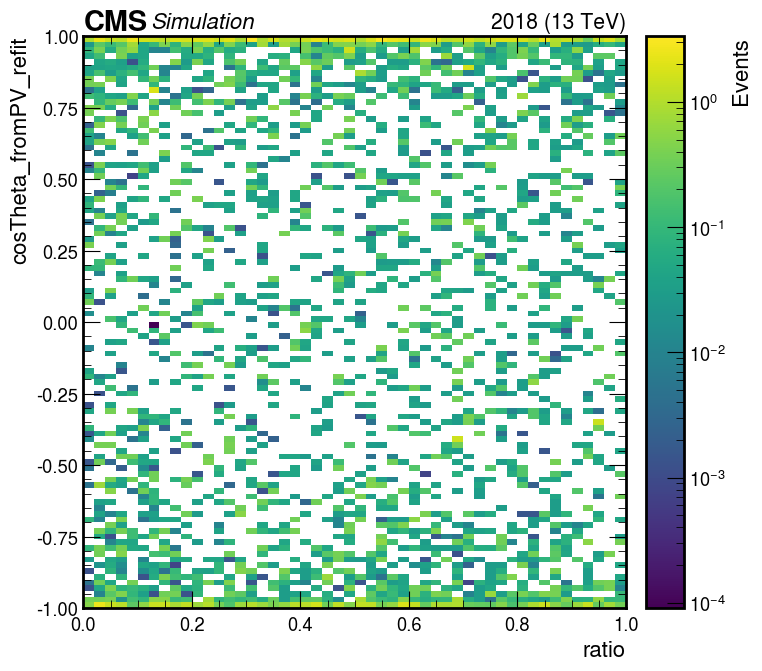

In [24]:
# Plot settings
fig, ax = plt.subplots(figsize=(7,7))

cut = 'cut9'
variable = 'sel_vtx_pt_ratio_vs_CosThetaColl_fromPV_refit'

plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_2d_dict = {
    'fig': fig,
    'ax': ax,
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': [0,1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'zlabel': 'Events',   
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots/{suffix}/data/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

# Data
ptools.plot_data_2D(data_histo, plot_dict, style_2d_dict)


# Bkg

style_2d_dict['fig'], style_2d_dict['ax'] = plt.subplots(figsize=(7,7))
ptools.plot_bkg_2D(bkg_histo, plot_dict, style_2d_dict, processes = 'all')

Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data/sel_vtx//data_VR_sel_vtx_vxy1_vs_CosThetaColl_cut4.png
Saved: ./plots/VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v8_m0p95/data/sel_vtx//data_VR_sel_vtx_vxy1_vs_CosThetaColl_cut4.png


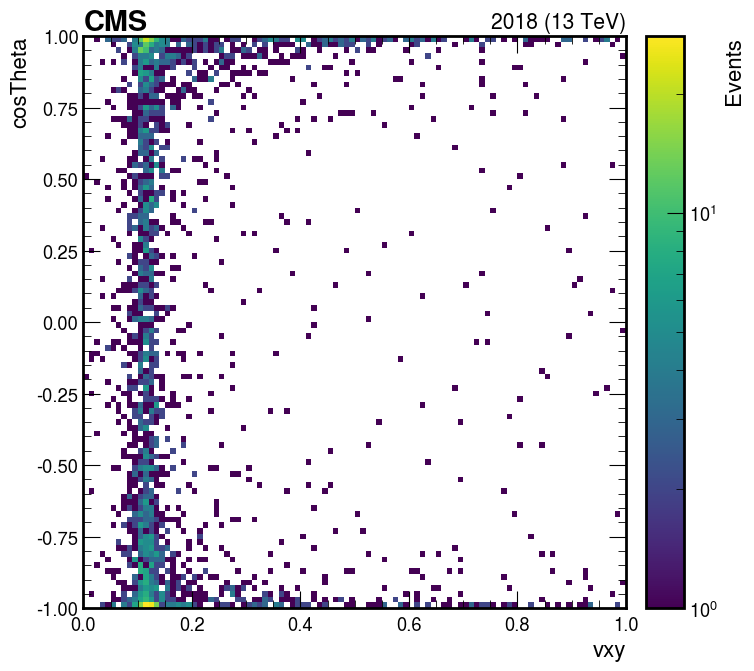

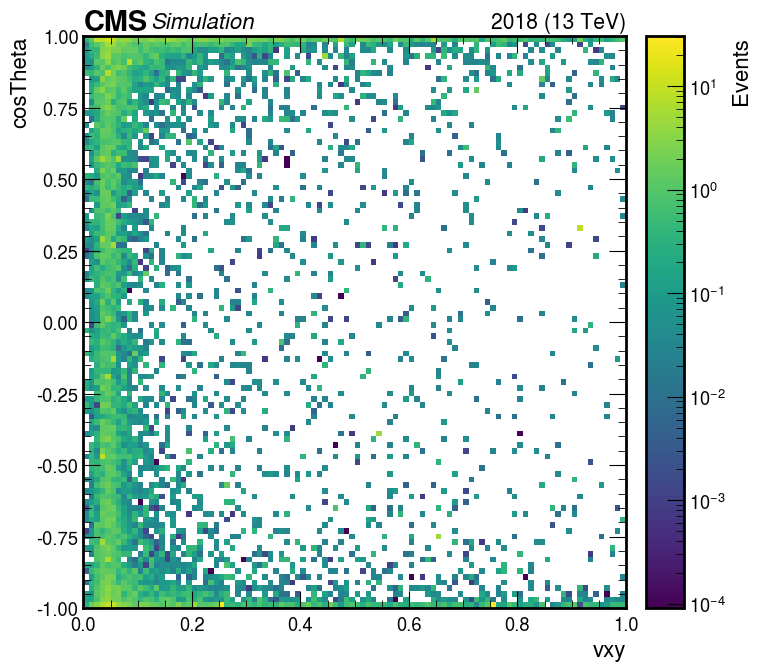

In [25]:
# Plot settings
fig, ax = plt.subplots(figsize=(7,7))

cut = 'cut4'
variable = 'sel_vtx_vxy1_vs_CosThetaColl'

plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

style_2d_dict = {
    'fig': fig,
    'ax': ax,
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'zlabel': 'Events',   
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots/{suffix}/data/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

# Data
ptools.plot_data_2D(data_histo, plot_dict, style_2d_dict)


# Bkg

style_2d_dict['fig'], style_2d_dict['ax'] = plt.subplots(figsize=(7,7))
ptools.plot_bkg_2D(bkg_histo, plot_dict, style_2d_dict, processes = 'all')

NameError: name 'sig_histo' is not defined

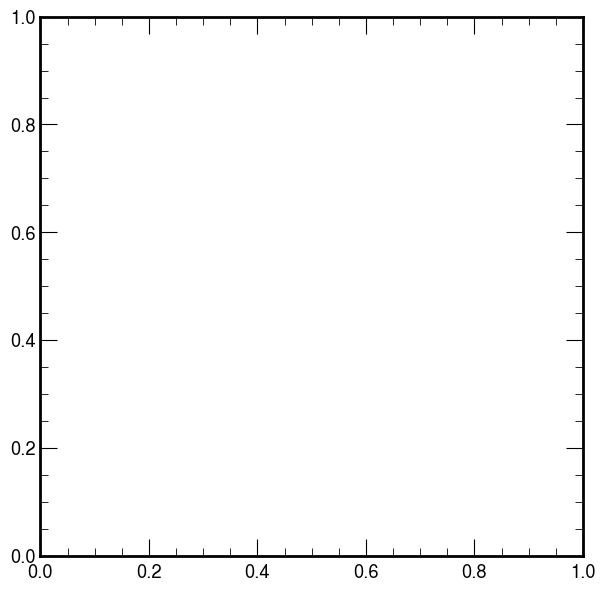

In [26]:
m1 = 30
delta = 0.1
ctau = 100

# Plot settings
fig, ax = plt.subplots(figsize=(7,7))

plot_dict = {
    'variable': 'sel_vtx_vx_vs_vy',
    'cut': 'cut9',
    'year': 2018
}

style_2d_dict = {
    'fig': fig,
    'ax': ax,
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': r"$v_{x}$ [cm]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': r"$v_{y}$ [cm]",   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'zlabel': 'Events',   
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/',
    'outName': f'signal_cut7_vx_vs_vy_m1_{m1}_delta_{delta}_ctau_{ctau}.png'
}

ptools.plot_signal_2D(sig_histo, m1, delta, ctau, plot_dict, style_2d_dict)